# Developing a Phone Plan Classification Model for a Mobile Carrier

# Contents <a id='back'></a>
* [1. Introduction](#intro)
* [2. Data Exploration](#data_exploration)
* [3. Exploratory Data Analysis (EDA)](#eda)
* [4. Development and Fine Tuning of Different Models](#models)
    * [Decision Tree](#decision_tree)
    * [Random Forest](#random_forest)
    * [Logistic Regression](#logistic_regression)
    * [Naive Bayes](#naive_bayes)
    * [K-Nearest Neighbors (KNN)](#knn)
    * [Support Vector Machine (Linear and Non-Linear)](#svm)
    * [Decision Tree with Adaptive Boosting](#adaboost_decision_tree)
    * [Random Forest with Adaptive Boosting](#adaboost_random_forest)
* [5. Final Model Selection and Evaluation](#final_model)
* [6. Sanity Check on the Final Model](#sanity_check)
    * [Learning Curve Analysis](#learning_curve)
    * [Classification Report Analysis](#classification_report)
    * [ROC Curve and AUC-ROC Score](#auc_roc)
* [7. General Conclusion](#general_conclusion)

## 1. Introduction <a id='intro'></a>

This project is to develop a binary classification model for a mobile carrier Megaline to recommend one of the two newer phone plans, Smart and Ultra. The model will be developed by analysing the existing subscriber's behaviour data.

### Purpose

To develop a binary classification model which analyses user behaviour and recommends the most suitable phone plan. **The accuracy of the model has to be 75% and above as requested by the Megaline company.**

---

In [1]:
# For data preprocessing and manipulation
import pandas as pd
import numpy as np
import inspect
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# For evaluation of machine learing models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, learning_curve

# Suppress the warning messages
import warnings
warnings.filterwarnings('ignore')

## 2. Data Exploration <a id='data_exploration'></a>

The Megaline company has provided us the data about the subsribers who have already switched to the new plans. As informed by the company, they have performed the data preprocessing step. We will have a general exploration of the cleaned dataset.

In [2]:
# Load dataset
try:
    data = pd.read_csv('users_behavior.csv')
except:
    data = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
# Have a look at the dataset
data

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


The dataset has 3214 rows (subscribers) and 5 columns of information related to each subsriber.

**Description of data**
- calls: number of calls
- minutes: total call duration in minutes
- messages: number of text messages
- mb_used: internet traffic used in MB
- is_ultra: plan for the current month (Ultra - 1, Smart - 0)

In [4]:
# Check for duplicates
data.duplicated().sum()

0

In [5]:
# Check if there is any missing value
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
# Check the data types
data.dtypes

calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object

In [7]:
# Look at the statictics of the numerical columns
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


No duplicates, no missing value, the data types are correct and also no anomalies. The dataset is clean as stated by the company.

The datasets contain four features, namely `calls`, `minutes`, `messages` and `mb_used` and a target variable `is_ultra` which will be used to develop the model.

[Back to Contents](#back)

## 3. Exploratory Data Analysis (EDA) <a id='eda'></a>

### Distributions of the Features Data

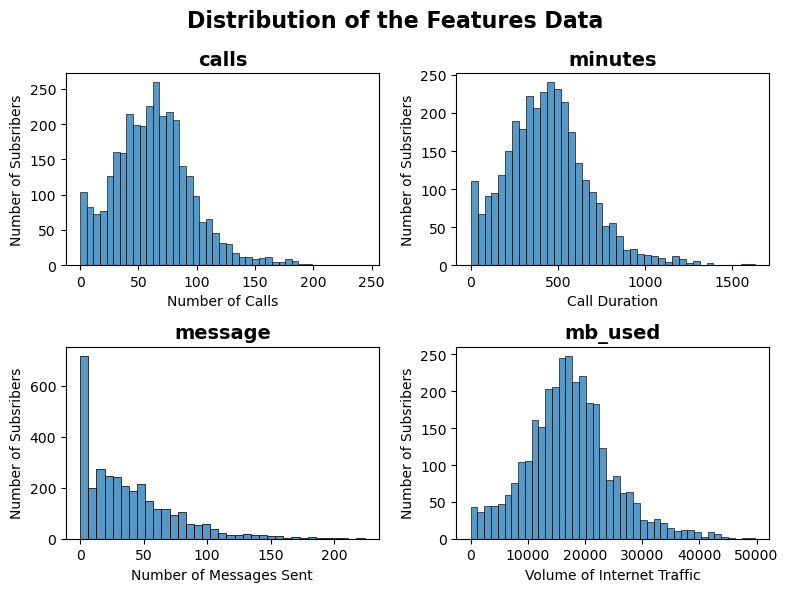

In [8]:
# Plot histograms for the features data to visualise the distribution
fig, axs = plt.subplots(2, 2, figsize=(8,6))
fig.suptitle('Distribution of the Features Data', fontsize=16, fontweight='bold')

sns.histplot(x=data['calls'], ax=axs[0][0])
axs[0][0].set_title('calls', fontsize=14, fontweight='bold')
axs[0][0].set_xlabel('Number of Calls')
axs[0][0].set_ylabel('Number of Subsribers')

sns.histplot(x=data['minutes'], ax=axs[0][1])
axs[0][1].set_title('minutes', fontsize=14, fontweight='bold')
axs[0][1].set_xlabel('Call Duration')
axs[0][1].set_ylabel('Number of Subsribers')

sns.histplot(x=data['messages'], ax=axs[1][0])
axs[1][0].set_title('message', fontsize=14, fontweight='bold')
axs[1][0].set_xlabel('Number of Messages Sent')
axs[1][0].set_ylabel('Number of Subsribers')

sns.histplot(x=data['mb_used'], ax=axs[1][1])
axs[1][1].set_title('mb_used', fontsize=14, fontweight='bold')
axs[1][1].set_xlabel('Volume of Internet Traffic')
axs[1][1].set_ylabel('Number of Subsribers')

plt.tight_layout()
plt.show()

All of the distributions of features data are not perfectly normal, especially there are quite a large portion of outliers in `message` data. 

Some of the machine learning algorithms require feature scaling before the model is trained. Since the distributions of the data are close to normal, standardisation will be applied to the features to preserve the distributions. Besides that, standardisation method is less affected by outliers.

### Distribution of the Target Classes

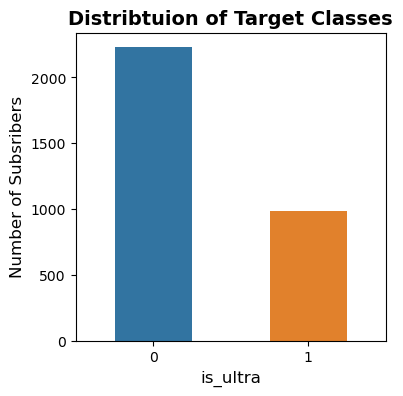

In [9]:
# Plot a countplot to visualise the distribtuion of target classes
plt.figure(figsize=(4,4))

sns.countplot(x='is_ultra', data=data, width=0.5)
plt.title('Distribtuion of Target Classes', fontsize=14, fontweight='bold')
plt.xlabel('is_ultra', fontsize=12)
plt.ylabel('Number of Subsribers', fontsize=12)
plt.show()

In [10]:
# Calculate the proportion of each class
data['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

The distribution of the target classes is imbalanced, with the ratio of the `0` class (Smart) to the `1` class (Ultra) being approximately 70:30. The proportion of the minority class is 30% and can be considered as a mild degree of imbalance ([reference link](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)). Therefore, it is decided that no further action will be taken to address the imbalanced classes. However, if the model does not perform well, there are some techniques to deal with this issue, such as upsampling and downsampling.

[Back to Contents](#back)

## 4. Development and Fine Tuning of Different Models <a id='models'></a>

---

The following functions will be used to automate the tasks in this section.

In [11]:
def custom_GridSearch(X_train, y_train, X_val, y_val, estimator, param_grid,
                      adaboost_param_grid=None, feature_scaling=False):
    """
    This function is a simplified version of GridSearchCV() function
    which does not use cross-validation method to find the accuracy score
    and adaptive boosting is added as an extra option
    This function returns a dataframe containing result of each model
    and the best model with the highest accuracy score
    """
    
    if feature_scaling == True:
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_val = sc.transform(X_val)
        
    model_param_list = []
    accuracy_list = []
    best_model = {}
    best_model_data = {'hyperparameters': None, 'accuracy': 0}
        
    for hyperparams in param_grid:
        for param_value in product(*hyperparams.values()):
            model_param = {key: value for key, value in zip(hyperparams.keys(), param_value)}
            
            # Check if the estimator accepts the random_state parameter
            if 'random_state' in inspect.signature(estimator).parameters:
                model = estimator(**model_param, random_state=12345)
            else:
                model = estimator(**model_param)
            
            if adaboost_param_grid is not None:
                for ada_hyperparams in adaboost_param_grid:
                    for ada_param_value in product(*ada_hyperparams.values()):
                        ada_model_param = {key: value for key, value in zip(ada_hyperparams.keys(), ada_param_value)}
                        ada_model = AdaBoostClassifier(base_estimator=model, **ada_model_param, random_state=12345)
                        ada_model.fit(X_train, y_train)                         
                        accuracy = ada_model.score(X_val, y_val)

                        model_param_list.append({**model_param, **ada_model_param})
                        accuracy_list.append(accuracy)

                        if accuracy > best_model_data['accuracy']:
                            best_model = ada_model
                            best_model_data['hyperparameters'] = {**model_param, **ada_model_param}
                            best_model_data['accuracy'] = accuracy                        
            else:                
                model.fit(X_train, y_train)                
                accuracy = model.score(X_val, y_val)

                model_param_list.append(model_param)
                accuracy_list.append(accuracy)

                if accuracy > best_model_data['accuracy']:
                    best_model = model
                    best_model_data['hyperparameters'] = model_param
                    best_model_data['accuracy'] = accuracy           
            
    search_result = pd.DataFrame({'params': model_param_list, 'accuracy': accuracy_list})
    search_result = pd.concat([pd.json_normalize(search_result['params']), search_result['accuracy']], axis=1)    
    
    return search_result, best_model, best_model_data

In [12]:
def sns_lineplot(data, x, y, title, figsize, hue=None):
    """
    This function plots a line graph to visualise the model training result
    """
    sns.set_style('whitegrid')
    plt.figure(figsize=figsize)
    
    if hue is None:
        sns.lineplot(data=data, x=x, y=y, errorbar=None, marker='o', linestyle='-')
    else:
        sns.lineplot(data=data, x=x, y=y, hue=hue, errorbar=None, style=hue, markers=True)
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x, fontsize=12, fontweight='bold')
    plt.ylabel(y, fontsize=12, fontweight='bold')
    plt.legend(title=hue, loc='upper left', bbox_to_anchor=(1,1))
    
    plt.show()

---

### Separating the Datasets into Training, Validation and Tests

The datasets will be divided in a ratio of **60:20:20 for training:validation:test**

In [13]:
# Set up the feature variable X and the target variable y
X = data.drop(columns=['is_ultra'])
y = data['is_ultra']

In [14]:
# Check the shape of X and y
X.shape, y.shape

((3214, 4), (3214,))

In [15]:
# Split the dataset a ratio of 80:20 where the 20% is the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Split the train_val set in a ratio of 75:25
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=123)

In [16]:
# Check the percentage of each variable in all the three sets
print('Percentage of X_train:', f'{X_train.shape[0] / X.shape[0]:.0%}')
print('Percentage of y_train:', f'{y_train.shape[0] / y.shape[0]:.0%}')
print('Percentage of X_val:', f'{X_val.shape[0] / X.shape[0]:.0%}')
print('Percentage of y_val:', f'{y_val.shape[0] / y.shape[0]:.0%}')
print('Percentage of X_test:', f'{X_test.shape[0] / X.shape[0]:.0%}')
print('Percentage of y_test:', f'{y_test.shape[0] / y.shape[0]:.0%}')

Percentage of X_train: 60%
Percentage of y_train: 60%
Percentage of X_val: 20%
Percentage of y_val: 20%
Percentage of X_test: 20%
Percentage of y_test: 20%


In [17]:
# Check the shape of each variable in all the three sets
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (1928, 4)
Shape of y_train: (1928,)
Shape of X_val: (643, 4)
Shape of y_val: (643,)
Shape of X_test: (643, 4)
Shape of y_test: (643,)


The dataset has been successfully split into the ratio of 60:20:20 for training:validation:test.

Next, lets start to develop different models and tune the hyperparameters to find the best model.

First of all, six machine learning models will be developed, namely `decision tree`, `random forest`, `logistic regression`, `naive bayes`, `k-nearest neighbors(KNN)`, `support vector machine`. 

Then, adaptive boosting will be applied on the `decision tree` model and some of the selected models.

[Back to Contents](#back)

### 4.1 Decision Tree <a id='decision_tree'></a>

Without any boosting algorithm, decision tree usually is a weak model, lets see what we can find.

In [18]:
# Create a dictionary to store all of the best models
best_model_dict = {}

# Create a dictionary to store the relevant information of best models
best_model_data_dict = {}

In [19]:
# Find the best decision tree model
dt_hyperparams = [{'criterion': ['gini', 'entropy'],
                   'max_depth': [x for x in range(1,21)]}]

dt_result, best_model_dict['Decision Tree'], best_model_data_dict['Decision Tree'] = custom_GridSearch(
    X_train = X_train, y_train = y_train,
    X_val = X_val, y_val = y_val,
    estimator = DecisionTreeClassifier,
    param_grid = dt_hyperparams,
    adaboost_param_grid = None,
    feature_scaling = False
)

In [20]:
# Have a look at the top 10 decision tree models
dt_result.sort_values('accuracy', ascending=False).reset_index(drop=True).head(10)

,criterion,max_depth,accuracy
0,gini,6,0.788491
1,entropy,7,0.788491
2,gini,9,0.788491
3,entropy,8,0.786936
4,gini,10,0.786936
5,gini,3,0.783826
6,entropy,3,0.783826
7,entropy,6,0.783826
8,gini,8,0.783826
9,gini,11,0.783826


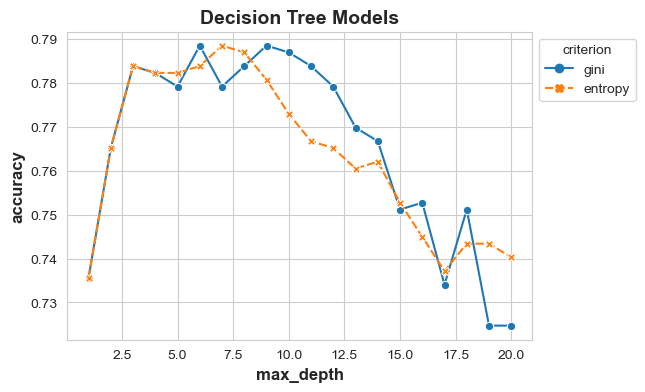

In [21]:
# Plot a line graph to visualise the training result
sns_lineplot(data=dt_result, x='max_depth', y='accuracy', hue='criterion',
             figsize=(6,4), title='Decision Tree Models')

Overall, the models with `gini` criterion have better accuracies than those of `entropy` criterion. The accuracy start dropping after a `max_depth` of 10.

In [22]:
# Show the best decision tree model
best_model_data_dict['Decision Tree']

{'hyperparameters': {'criterion': 'gini', 'max_depth': 6},
 'accuracy': 0.7884914463452566}

**The best decision tree model has an accuracy of 78.85%**

[Back to Contents](#back)

### 4.2 Random Forest <a id='random_forest'></a>

Random Forest is an ensemble model using bagging as the ensemble method. The model combines numerous decision trees to generate a more accurate prediction.

In [23]:
# Find the best random forest model
rf_hyperparams = [{'criterion': ['gini', 'entropy'], 
                   'n_estimators': [x for x in range(20,81,10)], 
                   'max_depth': [x for x in range(6,16)]}]

rf_result, best_model_dict['Random Forest'], best_model_data_dict['Random Forest'] = custom_GridSearch(
    X_train = X_train, y_train = y_train,
    X_val = X_val, y_val = y_val,
    estimator = RandomForestClassifier,
    param_grid = rf_hyperparams,
    adaboost_param_grid = None,
    feature_scaling = False
)

In [24]:
# Have a look at the top 10 random forest models
rf_result.sort_values('accuracy', ascending=False).reset_index(drop=True).head(10)

,criterion,n_estimators,max_depth,accuracy
0,entropy,50,10,0.804044
1,entropy,30,11,0.804044
2,gini,70,11,0.802488
3,entropy,80,12,0.802488
4,gini,50,14,0.802488
5,entropy,70,14,0.800933
6,gini,30,12,0.800933
7,entropy,50,12,0.800933
8,entropy,40,11,0.800933
9,entropy,40,9,0.800933


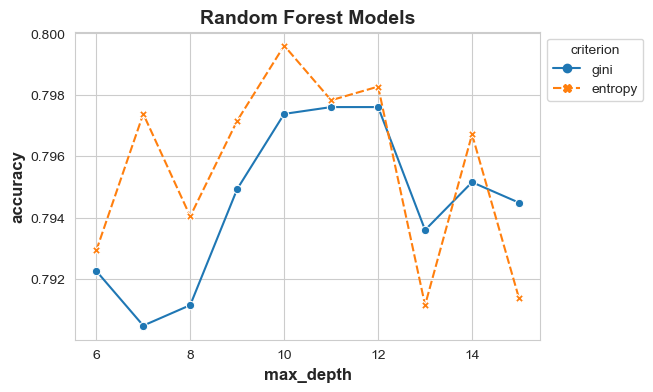

In [25]:
# Plot a line graph to visualise the training result
sns_lineplot(data=rf_result, x='max_depth', y='accuracy', hue='criterion',
             figsize=(6,4), title='Random Forest Models')

The random forest models have the best accuracies when the `max_depth` is between `10` to `12` for both criteria.

In [26]:
# Show the best random forest model
best_model_data_dict['Random Forest']

{'hyperparameters': {'criterion': 'entropy',
  'n_estimators': 30,
  'max_depth': 11},
 'accuracy': 0.8040435458786936}

**The best random forest model has an accuracy of 80.40%**

[Back to Contents](#back)

### 4.3 Logistic Regression <a id='logistic_regression'></a>

For the logistic regression model, the hyperparameter `C` can be tuned to prevent the model from being overfitting. In this case, feature scaling is needed since the features have different scales (0 to 244 for `calls` and `messages`, 0 to 49745 for `mb_used`). By applying standardisation on the features, it will be easier for the logistic regression algorithm to converge.

In [27]:
# Find the best logistic regression model
lr_hyperparams = [{'solver': ['lbfgs', 'liblinear'], 
                   'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

lr_result, best_model_dict['Logistic Regression'], best_model_data_dict['Logistic Regression'] = custom_GridSearch(
    X_train = X_train, y_train = y_train,
    X_val = X_val, y_val = y_val,
    estimator = LogisticRegression,
    param_grid = lr_hyperparams,
    adaboost_param_grid = None,
    feature_scaling = True
)

In [28]:
# Have a look at the top 10 logistic regression models
lr_result.sort_values('accuracy', ascending=False).reset_index(drop=True).head(10)

,solver,C,accuracy
0,liblinear,0.10,0.738725
1,liblinear,0.01,0.737170
2,lbfgs,0.10,0.735614
3,lbfgs,1.00,0.735614
4,liblinear,1.00,0.735614
5,lbfgs,10.00,0.734059
6,lbfgs,100.00,0.734059
7,liblinear,10.00,0.734059
8,liblinear,100.00,0.734059
9,lbfgs,0.01,0.732504


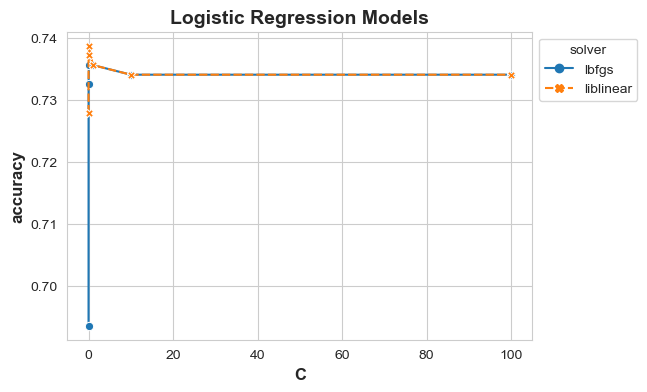

In [29]:
# Plot a line graph to visualise the training result
sns_lineplot(data=lr_result, x='C', y='accuracy', hue='solver',
             figsize=(6,4), title='Logistic Regression Models')

In [30]:
# Show the best logistic regression model
best_model_data_dict['Logistic Regression']

{'hyperparameters': {'solver': 'liblinear', 'C': 0.1},
 'accuracy': 0.7387247278382582}

**The best logistic regression model has an accuracy of 73.87%**

[Back to Contents](#back)

### 4.4 Naive Bayes <a id='naive_bayes'></a>

Naive bayes model is a probabilistic classifier based on the Bayes' theorem. There is nothing much we can do to tune the Naive Bayes model.

In [31]:
# Create the Naive Bayes model
nb_hyperparams = [{}]

nb_result, best_model_dict['Naive Bayes'], best_model_data_dict['Naive Bayes'] = custom_GridSearch(
    X_train = X_train, y_train = y_train,
    X_val = X_val, y_val = y_val,
    estimator = GaussianNB,
    param_grid = nb_hyperparams,
    adaboost_param_grid = None,
    feature_scaling = False
)

In [32]:
# Show the accuracy of the Naive Bayes model
best_model_data_dict['Naive Bayes']

{'hyperparameters': {}, 'accuracy': 0.7713841368584758}

**The naive bayes model has an accuracy of 77.14%**

[Back to Contents](#back)

### 4.5 K-Nearest Neighbors (KNN) <a id='knn'></a>

KNN is a distance-based algorithm which commonly use the Euclidean distance or Manhattan distance to determine the nearest neighbouring points of a given point. Feature scaling is needed for a distance-based algorithm.

In [33]:
# Find the best KNN model
knn_hyperparams = [{'n_neighbors': [x for x in range(5,11)], 'p': [1, 2]}]

knn_result, best_model_dict['K-Nearest Neighbors'], best_model_data_dict['K-Nearest Neighbors'] = custom_GridSearch(
    X_train = X_train, y_train = y_train,
    X_val = X_val, y_val = y_val,
    estimator = KNeighborsClassifier,
    param_grid = knn_hyperparams,
    adaboost_param_grid = None,
    feature_scaling = True
)

In [34]:
# Have a look at the top 10 KNN models
knn_result.sort_values('accuracy', ascending=False).reset_index(drop=True).head(10)

,n_neighbors,p,accuracy
0,7,1,0.811820
1,10,1,0.810264
2,6,1,0.807154
3,9,2,0.805599
4,8,1,0.804044
5,9,1,0.804044
6,10,2,0.804044
7,6,2,0.800933
8,7,2,0.799378
9,8,2,0.799378


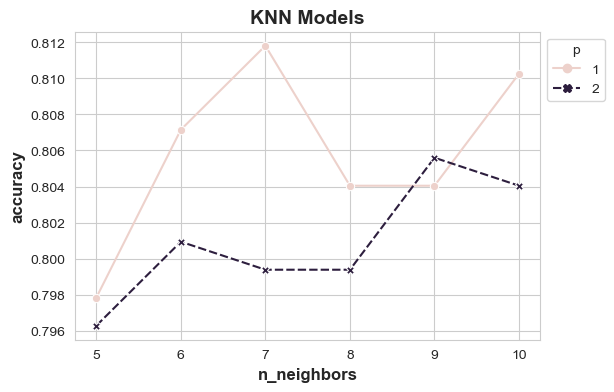

In [35]:
# Plot a line graph to visualise the training result
sns_lineplot(data=knn_result, x='n_neighbors', y='accuracy', hue='p',
             figsize=(6,4), title='KNN Models')

The accuracies of the KNN models which based on Manhattan distance are generally better than those based on the Euclidean distance.

In [36]:
# Show the best KNN model
best_model_data_dict['K-Nearest Neighbors']

{'hyperparameters': {'n_neighbors': 7, 'p': 1}, 'accuracy': 0.8118195956454122}

**The best KNN model has an accuracy of 81.18%**

[Back to Contents](#back)

### 4.6 Support Vector Machine (Linear and Non-Linear) <a id='svm'></a>

Support vector machine is also a distance-based algorithm and thus feature scaling will be applied.

In [37]:
# Find the best support vector machine model
svm_hyperparams = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                   {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]

svm_result, best_model_dict['Support Vector Machine'], best_model_data_dict['Support Vector Machine'] = custom_GridSearch(
    X_train = X_train, y_train = y_train,
    X_val = X_val, y_val = y_val,
    estimator = SVC,
    param_grid = svm_hyperparams,
    adaboost_param_grid = None,
    feature_scaling = True
)

In [38]:
# Have a look at the top 10 support vector machine models
svm_result.sort_values('accuracy', ascending=False).reset_index(drop=True).head(10)

,C,kernel,gamma,accuracy
0,10.0,rbf,1.00,0.804044
1,100.0,rbf,1.00,0.802488
2,100.0,rbf,0.10,0.796267
3,0.1,rbf,1.00,0.793157
4,1.0,rbf,1.00,0.793157
5,1.0,rbf,0.10,0.790047
6,1.0,rbf,10.00,0.788491
7,10.0,rbf,0.10,0.786936
8,100.0,rbf,0.01,0.782271
9,10.0,rbf,0.01,0.779160


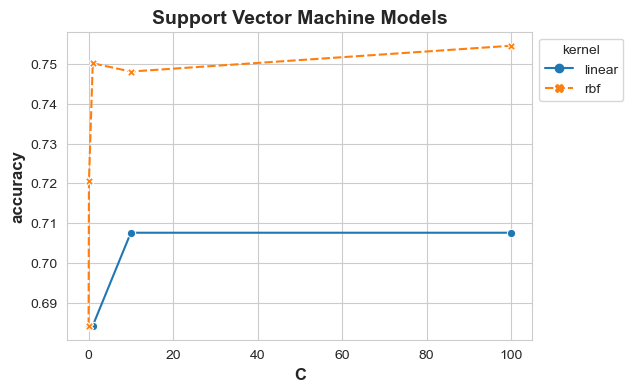

In [39]:
# Plot a line graph to visualise the training result
sns_lineplot(data=svm_result, x='C', y='accuracy', hue='kernel',
             figsize=(6,4), title='Support Vector Machine Models')

The non-liner support vector classifiers perform better in this dataset.

In [40]:
# Show the best SVM model
best_model_data_dict['Support Vector Machine']

{'hyperparameters': {'C': 10, 'kernel': 'rbf', 'gamma': 1},
 'accuracy': 0.8040435458786936}

**The best support vector machine model has an accuracy of 80.40%**

[Back to Contents](#back)

### 4.7 Decision Tree with Adaptive Boosting <a id='adaboost_decision_tree'></a>

Boosting is another ensemble model which train many weak learners in a sequential way. Each learner adaptively improve the model predictions by learning the mistakes made by the previous learner. Adaptive boosting is relatively slower compared to other boosting algorithms like gradient boosting but it is versatile and can be used with a variety of base estimators.

Adaptive boosting is most commonly used with the decision tree. Let's see if the accuracy of decision tree can be improved by applying adaptive boosting.

In [41]:
# Find the best decision tree model with adaptive boosting
dt2_hyperparams = [{'criterion': ['gini'], 
                    'max_depth': [x for x in range(10,16)]}]
dt2_adaboost_hyperparams = [{'n_estimators': [x for x in range(30,71,10)],
                             'learning_rate': [0.1, 1]}]

adaboost_dt_result, best_model_dict['Adaboost Decision Tree'], best_model_data_dict['Adaboost Decision Tree'] = custom_GridSearch(
    X_train = X_train, y_train = y_train,
    X_val = X_val, y_val = y_val,
    estimator = DecisionTreeClassifier,
    param_grid = dt2_hyperparams,
    adaboost_param_grid = dt2_adaboost_hyperparams,
    feature_scaling = False
)

In [42]:
# Have a look at the top 10 decision tree model with adaptive boosting
adaboost_dt_result.sort_values('accuracy', ascending=False).reset_index(drop=True).head(10)

,criterion,max_depth,n_estimators,learning_rate,accuracy
0,gini,12,60,1.0,0.799378
1,gini,15,50,1.0,0.797823
2,gini,12,50,1.0,0.796267
3,gini,11,60,1.0,0.794712
4,gini,12,30,1.0,0.794712
5,gini,11,70,1.0,0.793157
6,gini,12,40,1.0,0.793157
7,gini,15,70,1.0,0.793157
8,gini,12,70,1.0,0.793157
9,gini,11,50,1.0,0.791602


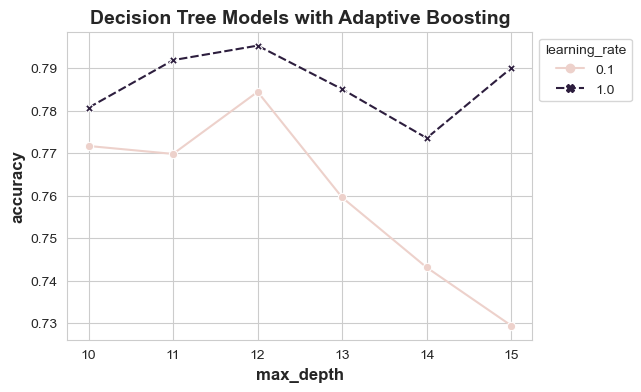

In [43]:
# Plot a line graph to visualise the training result
sns_lineplot(data=adaboost_dt_result, x='max_depth', y='accuracy', hue='learning_rate',
             figsize=(6,4), title='Decision Tree Models with Adaptive Boosting')

The boosting models with a `learning rate` of 1 have better accuracies than those of 0.1 `learning rate`. The accuracy start dropping after a `max_depth` of 12.

In [44]:
# Show the best decision tree models with adaptive boosting
best_model_data_dict['Adaboost Decision Tree']

{'hyperparameters': {'criterion': 'gini',
  'max_depth': 12,
  'n_estimators': 60,
  'learning_rate': 1},
 'accuracy': 0.7993779160186625}

**The best decision tree model with adaptive boosting has an accuracy of 79.94%**

[Back to Contents](#back)

### 4.8 Random Forest with Adaptive Boosting <a id='adaboost_random_forest'></a>

Random forest works similar to a decision tree and it achieved the second highest accuracy of 80.40% among the previously created model. Let's see if we can improve the performance of random forest with adaptive boosting.

In [45]:
# Find the best random forest with adaptive boosting
rf2_hyperparams = [{'n_estimators':[30],
                    'criterion': ['entropy'],
                    'max_depth': [x for x in range(5,10)]}]
rf2_adaboost_hyperparams = [{'n_estimators': [40, 50], 
                             'learning_rate': [0.1]}]

adaboost_rf_result, best_model_dict['Adaboost Random Forest'], best_model_data_dict['Adaboost Random Forest'] = custom_GridSearch(
    X_train = X_train, y_train = y_train,
    X_val = X_val, y_val = y_val,
    estimator = RandomForestClassifier,
    param_grid = rf2_hyperparams,
    adaboost_param_grid = rf2_adaboost_hyperparams,
    feature_scaling = False
)

In [46]:
# Have a look at the top 10 random forest models with adaptive boosting
adaboost_rf_result.sort_values('accuracy', ascending=False).reset_index(drop=True).head(10)

,n_estimators,criterion,max_depth,learning_rate,accuracy
0,50,entropy,6,0.1,0.805599
1,40,entropy,8,0.1,0.804044
2,40,entropy,7,0.1,0.800933
3,50,entropy,8,0.1,0.800933
4,40,entropy,6,0.1,0.799378
5,50,entropy,7,0.1,0.799378
6,40,entropy,5,0.1,0.796267
7,50,entropy,5,0.1,0.796267
8,50,entropy,9,0.1,0.791602
9,40,entropy,9,0.1,0.788491


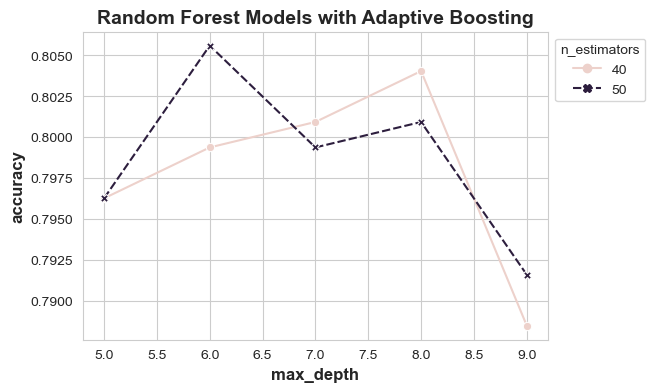

In [47]:
# Plot a line graph to visualise the training result
sns_lineplot(data=adaboost_rf_result, x='max_depth', y='accuracy', hue='n_estimators',
             figsize=(6,4), title='Random Forest Models with Adaptive Boosting')

The accuracy has a peak with a `max_depth` of 6 and `n_estimators` of 50.

In [48]:
# Show the best decision tree models with adaptive boosting
best_model_data_dict['Adaboost Random Forest']

{'hyperparameters': {'n_estimators': 50,
  'criterion': 'entropy',
  'max_depth': 6,
  'learning_rate': 0.1},
 'accuracy': 0.8055987558320373}

**The best random forest model with adaptive boosting has an accuracy of 80.56%**

[Back to Contents](#back)

## 5. Final Model Selection and Evaluation <a id='final_model'></a>

In [49]:
# Create two lists containing the information of best models
best_model_type = []
best_model_data = []

for classifier_type, classifier_data in best_model_data_dict.items():
    best_model_type.append(classifier_type)
    best_model_data.append(classifier_data)

# Create a dataframe containing all the best models and the accuracies
best_model_df = pd.DataFrame({'model': best_model_type, 'data': best_model_data})
best_model_df = pd.concat([best_model_df['model'], pd.json_normalize(best_model_df['data'], max_level=0)], axis=1)
best_model_df = best_model_df.sort_values('accuracy', ascending=False).reset_index(drop=True)

# Have a look at the dataframe
best_model_df

,model,hyperparameters,accuracy
0,K-Nearest Neighbors,"{'n_neighbors': 7, 'p': 1}",0.811820
1,Adaboost Random Forest,"{'n_estimators': 50, 'criterion': 'entropy', '...",0.805599
2,Random Forest,"{'criterion': 'entropy', 'n_estimators': 30, '...",0.804044
3,Support Vector Machine,"{'C': 10, 'kernel': 'rbf', 'gamma': 1}",0.804044
4,Adaboost Decision Tree,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.799378
5,Decision Tree,"{'criterion': 'gini', 'max_depth': 6}",0.788491
6,Naive Bayes,{},0.771384
7,Logistic Regression,"{'solver': 'liblinear', 'C': 0.1}",0.738725


The accuracies of the top five models are very close. Therefore, 5-fold cross validation will be performed to have more precise accuracy scores. The model with the highest mean accuracy score in the 5-fold corss validation will be selected as the final model.

In [50]:
# Create a function to perform the 5-fold cross validation
def calc_cross_val_score(model, model_name, X_train, y_train):
    """
    This function performs 5-fold cross validation on each model
    and return the mean of the 5 accuracy scores
    """
    
    if model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier']:
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        
    accuracies = cross_val_score(model[model_name], X=X_train, y=y_train, cv=5, n_jobs=-1)
    
    return accuracies.mean()

In [51]:
# Apply the function to find the mean of 5-fold cross validation accuracies
best_model_df['cross_val_accuracy'] = best_model_df['model'].apply(
    lambda x: calc_cross_val_score(best_model_dict, x, X_train_val, y_train_val)
)

In [52]:
# Check the 5-fold cross validation result
best_model_df.sort_values('cross_val_accuracy', ascending=False).reset_index(drop=True)

,model,hyperparameters,accuracy,cross_val_accuracy
0,Adaboost Random Forest,"{'n_estimators': 50, 'criterion': 'entropy', '...",0.805599,0.812139
1,Random Forest,"{'criterion': 'entropy', 'n_estimators': 30, '...",0.804044,0.803191
2,K-Nearest Neighbors,"{'n_neighbors': 7, 'p': 1}",0.811820,0.801247
3,Decision Tree,"{'criterion': 'gini', 'max_depth': 6}",0.788491,0.793463
4,Adaboost Decision Tree,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.799378,0.787240
5,Naive Bayes,{},0.771384,0.785297
6,Logistic Regression,"{'solver': 'liblinear', 'C': 0.1}",0.738725,0.748348
7,Support Vector Machine,"{'C': 10, 'kernel': 'rbf', 'gamma': 1}",0.804044,0.691949


The `adaboost random forest` has the highest cross validation score of 81.21%.

**The selected final model is the adaboost random forest model.**

### Evaluating the Performance of the Final Model with the Test Set

In [53]:
# Assign adaboost random forest model as the final model
final_model = best_model_dict['Adaboost Random Forest']

# Find the accuracy of the final model
y_pred = final_model.predict(X_test)
adaboost_rf_accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the adaboost random forest model on the test set: ', end='')
print(f'{adaboost_rf_accuracy:.2%}')

The accuracy of the adaboost random forest model on the test set: 81.65%


**The accuracy of the adaboost random forest model on the test set is 81.65% which meets the expectation of the phone carrier Megaline.**

[Back to Contents](#back)

## 6. Sanity Check on the Final Model <a id='sanity_check'></a>

### 6.1 Learning Curve Analysis <a id='learning_curve'></a>

In [54]:
# Find the difference between the accuracy scores on the training and test sets
print('The accuracy of the adaboost random forest model on the training set: ', end='')
print(f'{adaboost_rf_accuracy:.2%}')
print('The accuracy of the adaboost random forest model on the test set: ', end='')
print(f'{final_model.score(X_train, y_train):.2%}')
print('Difference of the scores:', end='')
print(f'{final_model.score(X_train, y_train) - adaboost_rf_accuracy:.2%}')

The accuracy of the adaboost random forest model on the training set: 81.65%
The accuracy of the adaboost random forest model on the test set: 88.95%
Difference of the scores:7.30%


The accuracy of the model on the traning set is 7.3% higher than than on the test sets, indicating a potential issue of overfitting. Lets check this issue by using different sizes of training sets and plot the learning curves of the model on the training and validation sets.

In [55]:
# Train and test the final model with different sizes of training sets
train_sizes, train_accuracies, test_accuracies = learning_curve(
    final_model, X_train_val, y_train_val,
    cv=5, train_sizes=np.linspace(0.2, 1.0, 5),
    scoring='accuracy', n_jobs=-1
)

# find the mean values to plot the learning curves
train_accuracies_mean = np.mean(train_accuracies, axis=1)
test_accuracies_mean = np.mean(test_accuracies, axis=1)

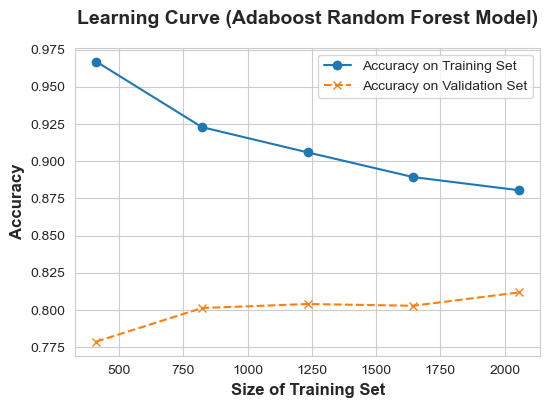

In [56]:
# Plot the learning curves
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))

plt.plot(train_sizes, train_accuracies_mean, marker='o', ls='-', 
         label='Accuracy on Training Set')
plt.plot(train_sizes, test_accuracies_mean, marker='x', ls='--', 
         label='Accuracy on Validation Set')

plt.title('Learning Curve (Adaboost Random Forest Model)', 
          fontsize=14, fontweight='bold', y=1.05)
plt.xlabel('Size of Training Set', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.legend()

plt.show()

From the graph above, the gap between the two curves decreases with the increasing sizes of training set. By collecting more data of minority class, the training curve and the validation curve might converge and give a better model. Convergence of the training and validation curves is often a sign that the model is benefiting from a larger training set, and it is less likely to overfit the data.

[Back to Contents](#back)

### 6.2 Classification Report Analysis <a id='classification_report'></a>

In [57]:
# Show the confusion matrix and the classification report
print('Confusion Matrix:')
display(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print('-'*60)
print('Classification Report')
print(classification_report(y_test, y_pred))

Confusion Matrix:


,0,1
0,417,33
1,85,108


------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       450
           1       0.77      0.56      0.65       193

    accuracy                           0.82       643
   macro avg       0.80      0.74      0.76       643
weighted avg       0.81      0.82      0.81       643



From the classification report, it can be seen that the model performs better at predicting the `0` class (`Smart` users), with a f1-score of 88%.

The precision for the `0` class (`Smart` users) and the `1` class (`Ultra` users) are 83% and 77% respectively. This indicates most of the recommendations made by the model for both classes are correct.

On the other hand, a high recall rate of 93% for the `0` group implies that the model can almost capture all the potentail `Smart` users. Nevertheless, a low recall rate of 56% for the `1` class (`Ultra` users) infers that the model cannot effectively identify the potential `Ultra` users.

Since the target variable has an imbalanced classes of 70:30, this could be one of the reasons that the model is poor at predicting the `1` class. This can be verified by the slightly higher weighted avg scores than the macro avg scores. To improve the model, we can consider to use upsampling or downsampling to balance the classes.

[Back to Contents](#back)

### 6.3 ROC Curve and AUC-ROC Score <a id='auc_roc'></a>

The ROC curve is a plot of the true positive rate against the false positive rate at different thresholds. The AUC-ROC score meausres the ability of a model to distinguish between positive and negative classes. Let's evaluate the final model with the ROC curve and the AUC-ROC score. 

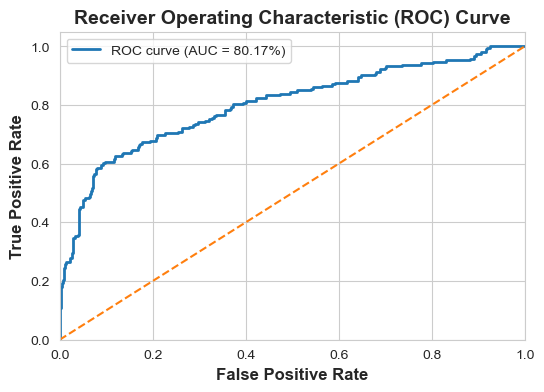

In [58]:
# Find the probabilities for the model to classify a user as the `1` class
y_scores = final_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2%})')
plt.plot([0, 1], [0, 1], ls='--')

plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='upper left')

plt.show()

**A AUC-ROC score of 80.17% implies that the model can generally be considered as a good model.**


**Possible Improvement on the Model**

1. Use more data to train the model so that the learning curves can converge better.
2. Use upsampling, downpling or other methods to balance the class.
3. Adjusting the classification threshold by analysing the ROC curve and the need of the Megaline company.

[Back to Contents](#back)

## 7.0 General Conclusion <a id='general_conclusion'></a>

**Data Exploration**

In this stage, the dataset has been verified to be in a good condition as stated by the Megaline company to develop a binary classification model to to recommend one of the two newer phone plans, Smart and Ultra.

**Exploratory Data Analysis**

The distributions of features data are not perfectly normal, especially there are quite a large portion of outliers in `message` data. Some of the machine learning algorithms require feature scaling before the model is trained. Since the distributions of the data are close to normal, standardisation will be applied to the features to preserve the distributions. 

**Development and Fine Tuning of Different Models**


The dataset has been split into a ratio of 60:20:20 for training:validation:test.A total of eight machine learning models have been developed, namely `decision tree`, `random forest`, `logistic regression`, `naive bayes`, `k-nearest neighbors(KNN)`, `support vector machine` and two `adaptive boosting models` with decision tree and random forest as base estimators h

**Selecting the Final Model**

After conducting a 5-fold cross validation, **the `adaboost random forest` has the highest cross validation score of 81.21%** and is selected as the final model. **The accuracy of the adaboost random forest model on the test set is 81.65%** which meets the expectation of the phone carrier Megaline.

**Sanity Check on the Final Model**

By conducting the learning curve analysis, it is found that the model can perform better with more data input.From the classification report, it can be concluded that the model is better at identifying and predicting the `0` class (`Smart` user). **A ROC-AUC score of 80.17% indicating that the model is considered as a good model.**

**Possible Improvement on the Model**

1. Use more data to train the model for the learning curves to be converged.
2. Use upsampling, downpling or other methods to balance the class.
3. Adjusting the classification threshold by analysing the ROC curve and the need of the Megaline company.

[Back to Contents](#back)